6.78_data_visualization_two_variables

通过Matplotlib和Seaborn，对两个变量绘制图表

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 一、散点图 

英文是Scatter Plot，Seaborn绘制散点图的函数叫做scatterplot

In [15]:
# 当本地没有此数据集，会自动从线上Seaborn数据库加载，Seaborn数据库数据集https://github.com/mwaskom/seaborn-data
df1 = sns.load_dataset('tips')
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


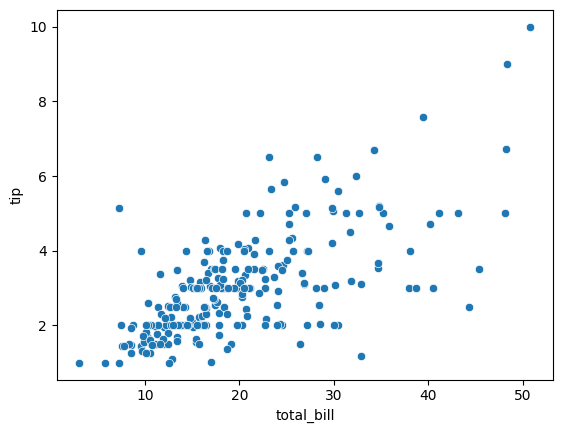

In [10]:
sns.scatterplot(df1, x='total_bill', y='tip')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

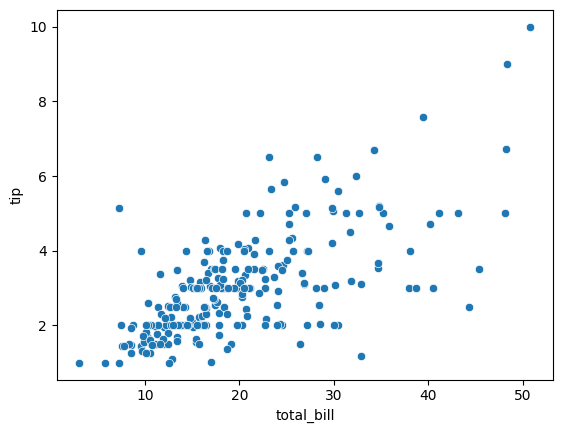

In [11]:
sns.scatterplot(x=df1.total_bill, y=df1['tip'])

### 二、折线图

英文是Line Plot，Seaborn绘制折线图的函数叫做lineplot

In [13]:
df2 = sns.load_dataset('flights').query('month == "Jan"')
df2

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145
36,1952,Jan,171
48,1953,Jan,196
60,1954,Jan,204
72,1955,Jan,242
84,1956,Jan,284
96,1957,Jan,315
108,1958,Jan,340


<Axes: xlabel='year', ylabel='passengers'>

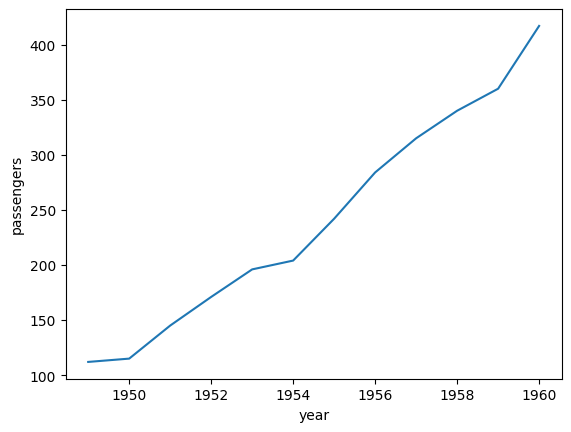

In [14]:
sns.lineplot(x=df2.year, y=df2.passengers)

### 三、条形图

英文是Bar Plot，Seaborn绘制条形图的函数叫做barplot

**默认情况下，条柱的高度对应所属分类下的所有值的平均值。如果希望展示其他聚合值，可选参数`estimator=聚合函数`**

In [3]:
df3 = sns.load_dataset('penguins')
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='species', ylabel='body_mass_g'>

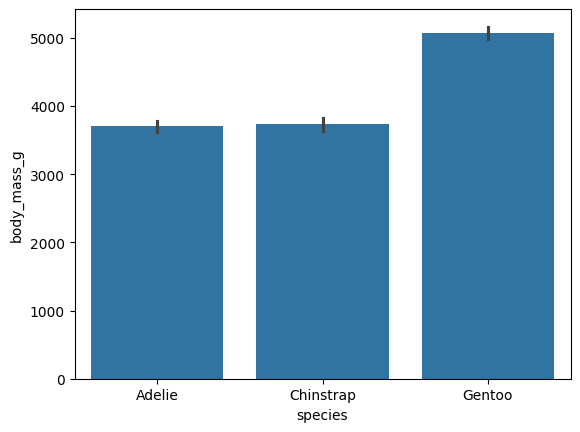

In [4]:
sns.barplot(data=df3, x='species', y='body_mass_g')

<Axes: xlabel='species', ylabel='body_mass_g'>

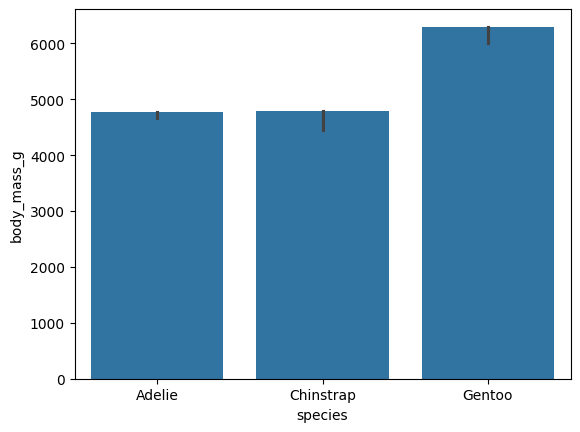

In [6]:
sns.barplot(data=df3, x='species', y='body_mass_g', estimator=np.max)

### 四、计数图

如果希望条柱的高度对应个数，需要使用计数图。

英文是Count Plot，Seaborn绘制计数图的函数叫做countplot

与条形图区别：只需要用一个分类变量绘制图表

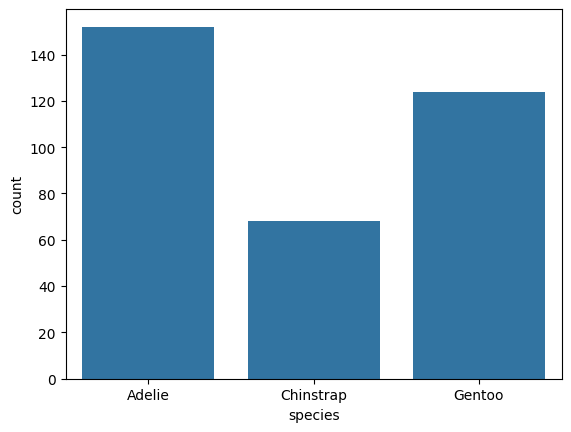

In [16]:
sns.countplot(df3, x='species')
plt.show()

### 五、饼图

**Seaborn没有绘制饼图的函数，需要调用Matplotlib的pie函数**

1. 参数

    - **直接传入需要计算比例的Series,`DataFrame.列名1`，Matplotlib中的函数不支持传入整个DataFrame再指定变量**
  
    - 指定标签，可选参数`labels=DataFrame.列名2`
  
      **标签与数据的个数和顺序都要对应**
  
    - 显示比例数字标签, 可选参数`autopct='文字格式'`，例：`autppct='%.1f%%'`
  
          - autopct是用来设置每个扇形里文字标签格式的参数

          - 文字格式要以`%`开头；`.1f`表示小数点后保留1位小数；`%%`表示数字标签要以'%'结尾，之所以用两个百分比符号，表示文字标签里的一个百分比，是因为程序需要区分于表示文字格式起始的一个百分比

          - 以此类推，如果纸箱保留整数比例数字，可以改成`.0f`;如果想移除百分比符号，可以把格式字符串中，最后两个百分比符号去掉

2. **大多数情况，数据集里没有各个类别数量的数据，需要自己获得**

   - 对分类变量的Series，调用`value_counts`方法，会获得一个Series。这个Series可以直接传入`pie`函数中，`labels=Series.index`
  
   -  `df.groupby('分类变量')['无缺失值的列'].count()`，会返回一个Series。这个Series可以直接传入`pie`函数中，`labels=Series.index`

In [17]:
# 设置示例数据
df4 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana', 'pear'],
                     'vote': [32, 22, 19, 7]})
df4

,fruit,vote
0,apple,32
1,orange,22
2,banana,19
3,pear,7


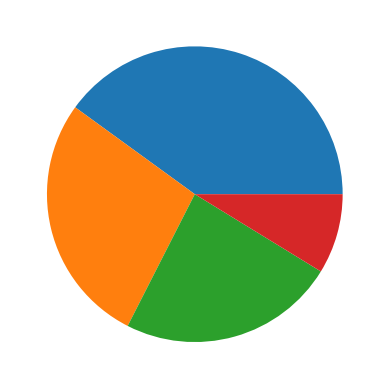

In [18]:
plt.pie(df4.vote)
plt.show()

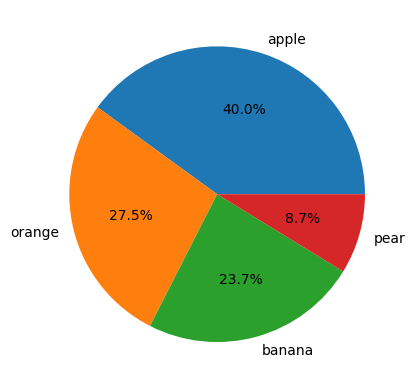

In [19]:
plt.pie(df4.vote, labels=df4.fruit, autopct='%.1f%%')
plt.show()

### 六、更改图表颜色

许多绘图函数都支持color这个可选参数，`color='颜色的英文'`或者`color='表示颜色的16进制值'`

<Axes: xlabel='total_bill', ylabel='tip'>

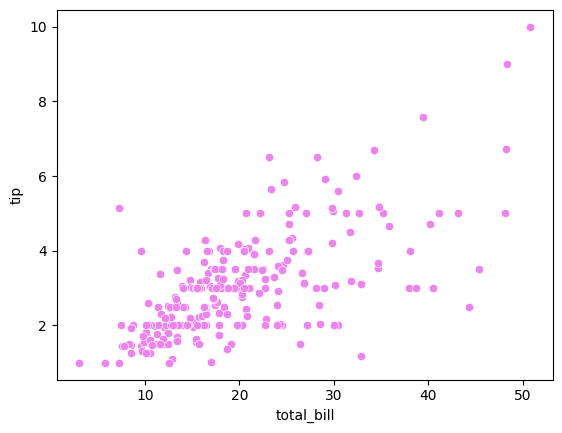

In [20]:
sns.scatterplot(x=df1.total_bill, y=df1['tip'], color='violet')

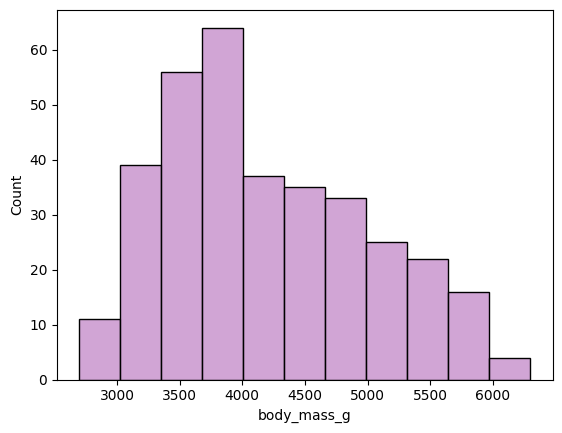

In [21]:
sns.histplot(data=df3, x="body_mass_g",
              color="#c287c7")
plt.show()

### 七、更改图表色盘

适用于包含分类数据的图表，意思是更改一整套颜色主题

调用Seaborn的set_palette函数

<Axes: xlabel='species', ylabel='body_mass_g'>

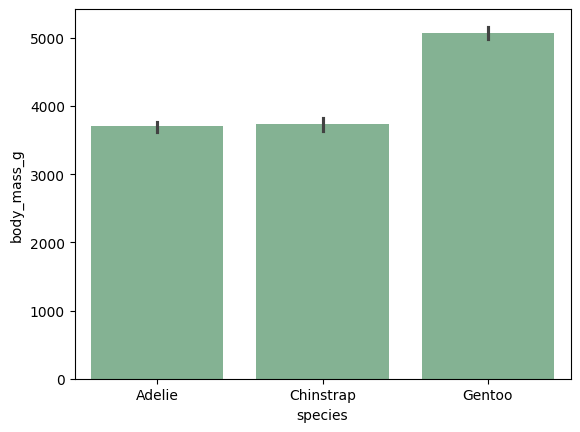

In [24]:
sns.set_palette('crest')
sns.barplot(data=df3, x='species', y='body_mass_g')

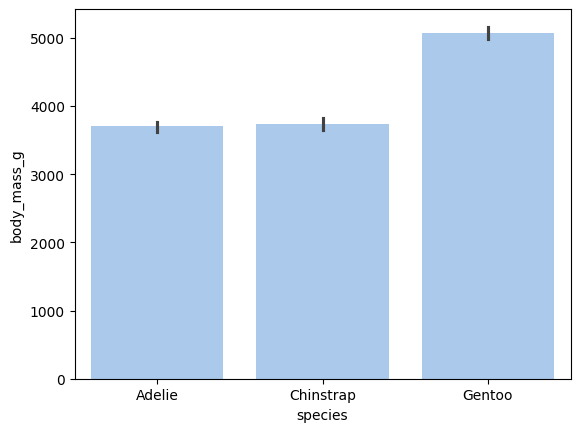

In [25]:
sns.set_palette('pastel')
sns.barplot(data=df3, x='species', y='body_mass_g')
plt.show()